In [14]:
import pandas as pd
pd.options.mode.chained_assignment = None


data = pd.read_csv('../unseen_species_model/results/occupation/raw_results.csv', index_col =[0])
data_group = data.groupby(['region_name', 'decade']).agg({'f0':'sum', 'min_f0':'sum', 'max_f0':'sum', 'f1':'sum', 'f2':'sum', 'individual_wikidata_id':'count'}).reset_index()
data_group = data_group.rename(columns={'individual_wikidata_id':'N'})

# Get the full number of unseen individuals
data_group['N_unseen'] = data_group['f0'] +  data_group['f1'] +  data_group['f2']
data_group['N_unseen_min'] = data_group['min_f0'] +  data_group['f1'] +  data_group['f2']
data_group['N_unseen_max'] = data_group['max_f0'] +  data_group['f1'] +  data_group['f2']
data_group = data_group[data_group['decade']<=1800]


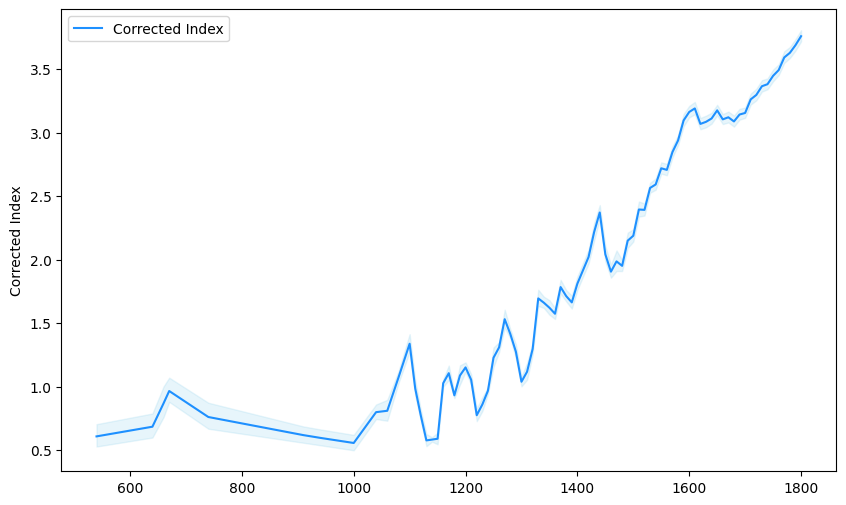

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

region_name = 'United Kingdom'
data_fil = data_group[data_group['region_name'] == region_name]
df = data_fil[['region_name', 'decade', 'N_unseen_min', 'N_unseen', 'N_unseen_max']]

df['N_unseen_min'] = np.log10(df['N_unseen_min'])
df['N_unseen'] = np.log10(df['N_unseen'])
df['N_unseen_max'] = np.log10(df['N_unseen_max'])

# Add columns to the DataFrame
df['percent_diff_max'] = df['N_unseen_max']/df['N_unseen']
df['percent_diff_min'] = df['N_unseen_min']/df['N_unseen']

frac = 0.05

# Compute LOWESS regression for lower bound
lowess_unseen = lowess(df['N_unseen'], df['decade'], frac=frac)
lowess_unseen_min = lowess_unseen[:, 1]*df['percent_diff_min']
lowess_unseen_max = lowess_unseen[:, 1]*df['percent_diff_max']

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df['decade'], lowess_lower[:, 1], label='LOWESS Lower Bound', color='blue')
#plt.plot(df['decade'], lowess_upper[:, 1], label='LOWESS Upper Bound', color='orange')
plt.plot(df['decade'],lowess_unseen[:, 1], label='Corrected Index', color='dodgerblue')
plt.fill_between(df['decade'], lowess_unseen_min, lowess_unseen_max, color='skyblue', alpha=0.2)
plt.xlabel('')
plt.ylabel('Corrected Index')
plt.title('')
plt.legend()
plt.grid(False)



In [17]:
max(lowess_unseen_min)

3.752665938273092